In [26]:
#### ASSIGNMENT 03 - AIDI2000 ####
#### PART 04 - CONVOLUCIONAL NEURAL NETWORK - CNN ####

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

In [27]:
# Load Fashion MNIST dataset
print("Loading Fashion MNIST dataset...")
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Loading Fashion MNIST dataset...


In [28]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
# Preprocess the data
# Reshape for CNN (add channel dimension)
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [30]:
# Normalize pixel values to be between 0 and 1
X_train_cnn /= 255.0
X_test_cnn /= 255.0

In [31]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

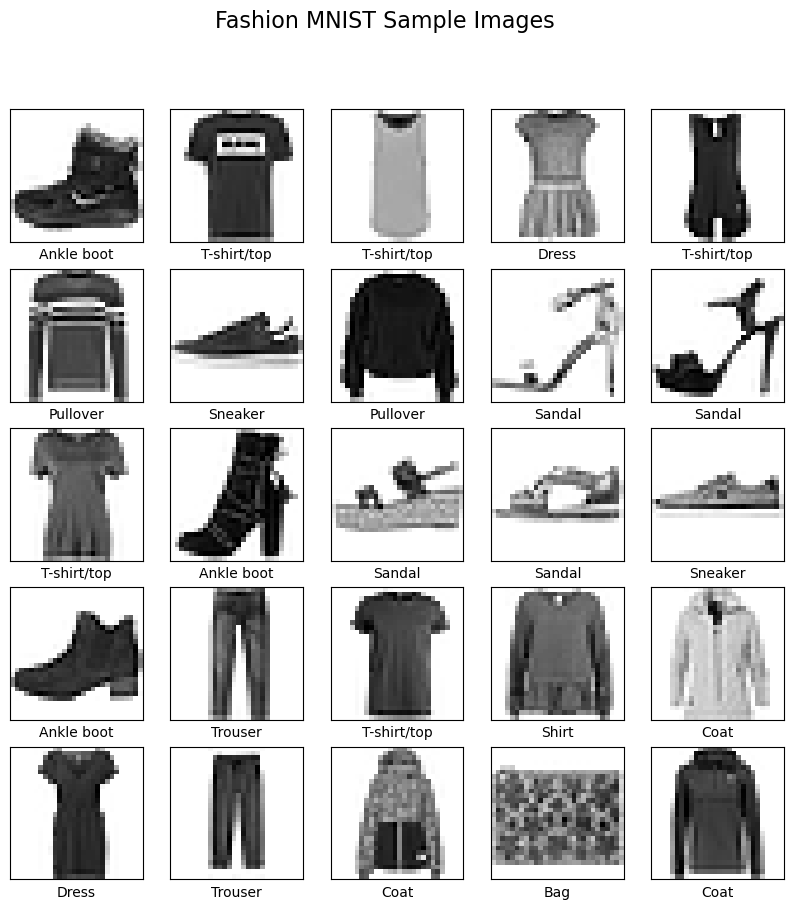

In [32]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle('Fashion MNIST Sample Images', fontsize=16)
plt.show()

In [33]:
print("\nBuilding CNN model...")
model = Sequential([
    # First Conv2D + MaxPooling block
    tf.keras.Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second Conv2D + MaxPooling block
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Third Conv2D + MaxPooling block
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten + Dense layers
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Building CNN model...


In [34]:
print("\nCNN Model Summary:")
model.summary()


CNN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
print("\nTraining CNN model...")
cnn_history = model.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Training CNN model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6411 - loss: 1.2424 - val_accuracy: 0.8535 - val_loss: 0.5876
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8382 - loss: 0.6381 - val_accuracy: 0.8740 - val_loss: 0.4999
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8614 - loss: 0.5417 - val_accuracy: 0.8815 - val_loss: 0.4467
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8727 - loss: 0.4953 - val_accuracy: 0.8830 - val_loss: 0.4364
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8780 - loss: 0.4749 - val_accuracy: 0.8827 - val_loss: 0.4298
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8864 - loss: 0.4526 - val_accuracy: 0.8922 - val_loss: 0.4093
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8862 - loss: 0.4405 - val_accuracy: 0.8947 - val_loss: 0.3982
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0

In [36]:
print("\n--- CNN Model Evaluation ---")
cnn_test_loss, cnn_test_acc = model.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"Test accuracy: {cnn_test_acc:.4f}")
print(f"Test loss: {cnn_test_loss:.4f}")


--- CNN Model Evaluation ---
Test accuracy: 0.8952
Test loss: 0.3999


In [37]:
# Generate predictions and classification reports
cnn_predictions = model.predict(X_test_cnn)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [55]:
# Print classification reports
print("\nCNN Classification Report:")
class_report = classification_report(y_test, cnn_pred_classes, target_names=class_names)
print(class_report)


CNN Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.89      0.82      0.86      1000
       Dress       0.84      0.93      0.88      1000
        Coat       0.82      0.87      0.84      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.75      0.67      0.71      1000
     Sneaker       0.89      0.99      0.94      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [56]:
# Set classification report as String for further analysis
class_report = classification_report(y_test, cnn_pred_classes, target_names=class_names, output_dict=True)

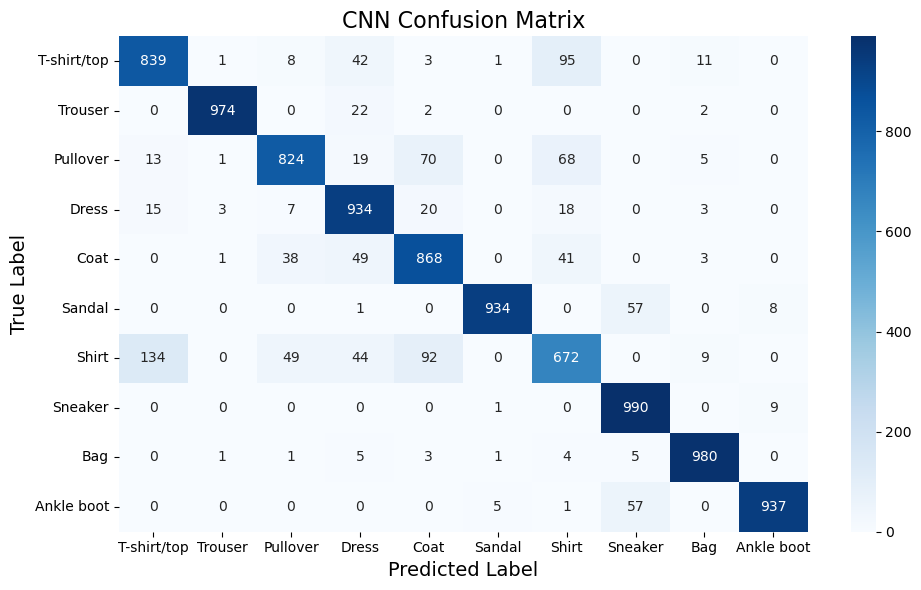

In [39]:
# Plot confusion matrices
plt.figure(figsize=(10, 6))

cnn_cm = confusion_matrix(y_test, cnn_pred_classes)
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('CNN Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

plt.tight_layout()
plt.show()

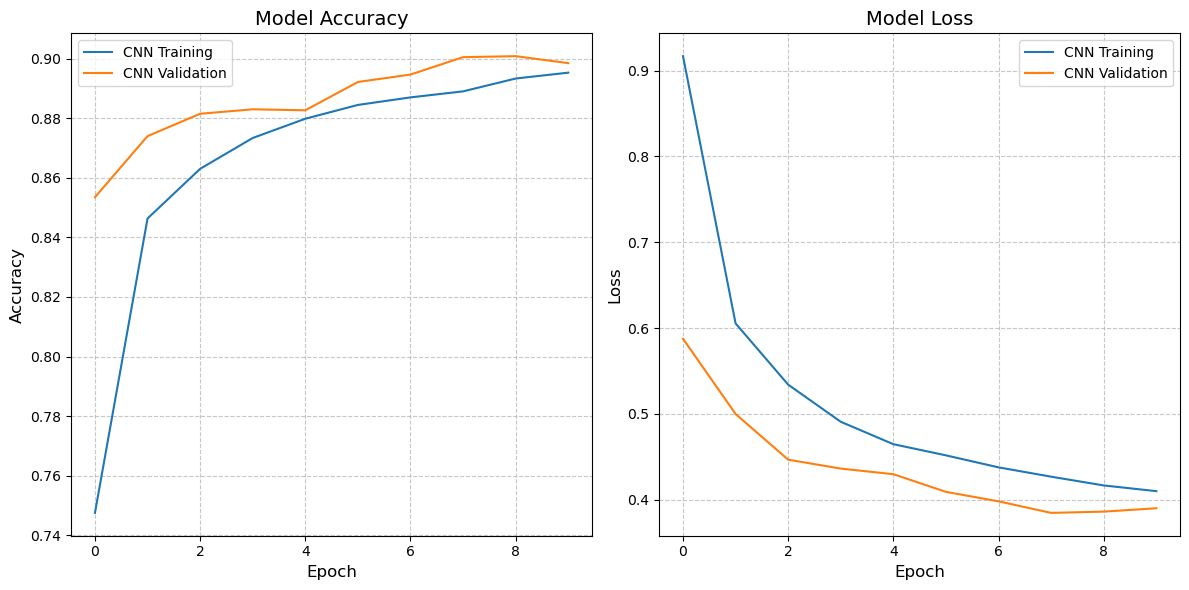

In [40]:
# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN Training')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [41]:
# Display some example predictions
def plot_image_predictions(images, true_labels, cnn_preds, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        
        cnn_pred = np.argmax(cnn_preds[i])
        cnn_correct = (cnn_pred == true_labels[i])
        
        plt.title(f"True: {class_names[true_labels[i]]}\n"
                 f"CNN: {class_names[cnn_pred]} ({'ok' if cnn_correct else 'X'})")
        
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
    
    plt.tight_layout()
    plt.show()

In [42]:
# Select a few test examples
test_indices = np.random.choice(len(X_test), 9, replace=False)
test_images = X_test[test_indices]
test_labels = y_test[test_indices]
cnn_test_preds = cnn_predictions[test_indices]

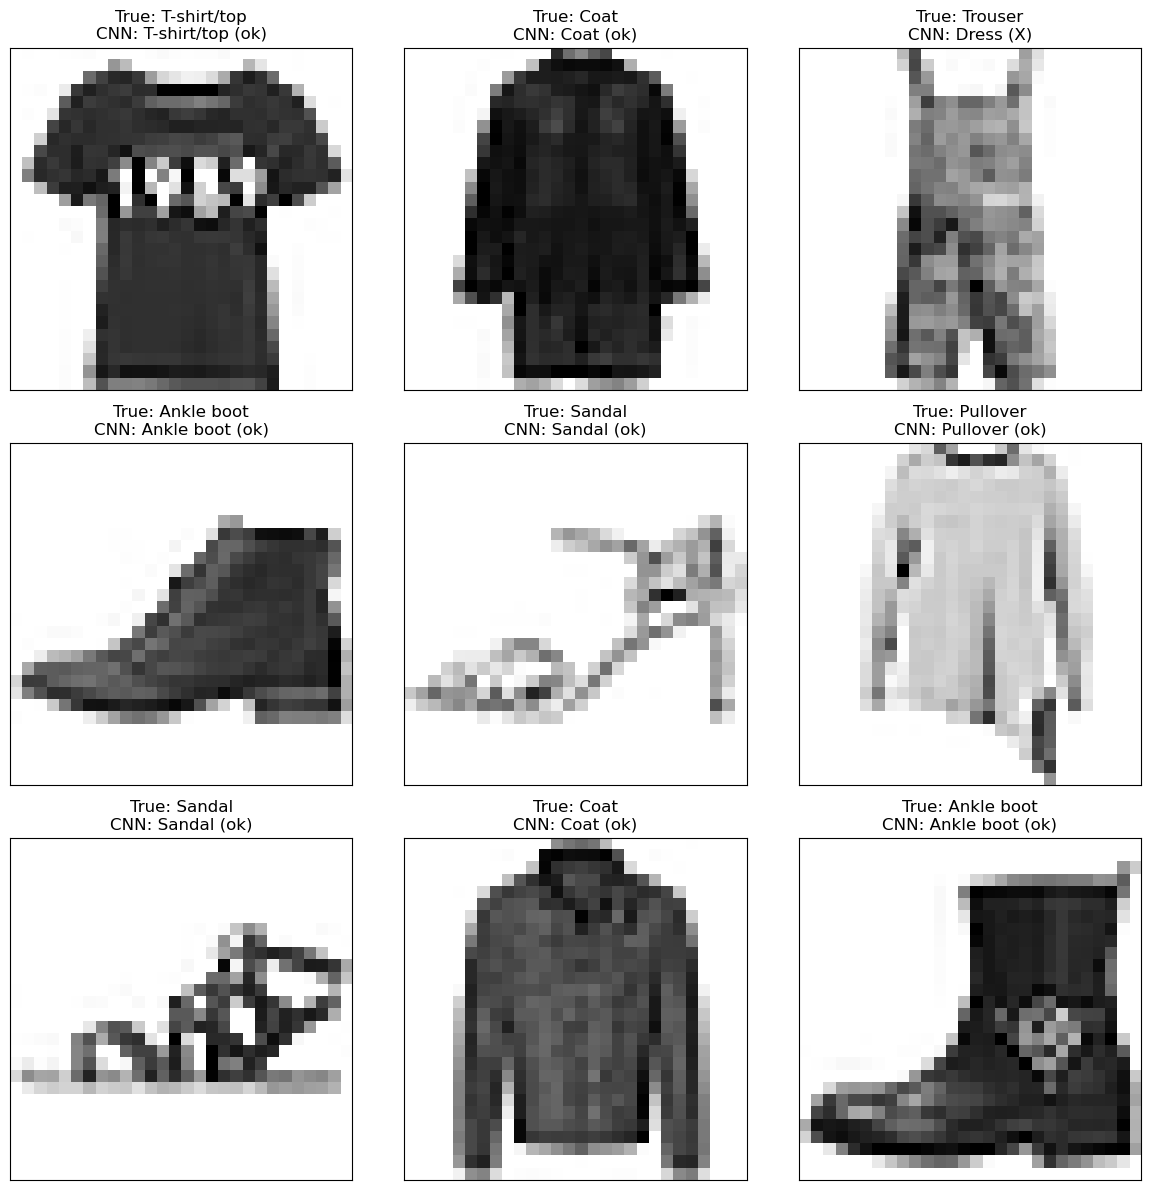

In [43]:
# Plot the example predictions
plot_image_predictions(test_images, test_labels, cnn_test_preds, class_names)

In [ ]:
# Print a summary of CNN performance
class_f1_scores = [(class_name, class_report[class_name]['f1-score']) for class_name in class_names]
class_f1_scores.sort(key=lambda x: x[1], reverse=True)

print("\nConclusion:")
print("The CNN model demonstrates strong performance on the Fashion MNIST dataset,")
print(f"achieving {cnn_test_acc:.4f} test accuracy. The model is particularly effective")
print(f"at classifying {class_f1_scores[0][0]}, {class_f1_scores[1][0]}, and {class_f1_scores[2][0]},")
print(f"but struggles more with {class_f1_scores[-1][0]}, {class_f1_scores[-2][0]}, and {class_f1_scores[-3][0]}.")
print("The convolutional layers effectively capture the spatial patterns in the clothing items,")
print("allowing the model to learn hierarchical features important for classification.")


Conclusion:
The CNN model demonstrates strong performance on the Fashion MNIST dataset,
achieving 0.8952 test accuracy. The model is particularly effective
at classifying Trouser, Bag, and Sandal,
but struggles more with Shirt, T-shirt/top, and Coat.
The convolutional layers effectively capture the spatial patterns in the clothing items,
allowing the model to learn hierarchical features important for classification.


In [45]:
# Discussion on when CNNs are better than MLPs for image classification
print("\n--- When CNNs are Better than MLPs for Image Classification ---")
print("1. Spatial Hierarchy and Feature Detection:")
print("   - CNNs use convolutional filters that scan across the image, detecting features")
print("     like edges, textures, and patterns regardless of their position")
print("   - MLPs treat each pixel as an independent input, losing spatial relationships")
print("   - CNNs build a hierarchy of features from simple to complex through layers")
print()
print("2. Parameter Efficiency:")
print("   - CNNs use parameter sharing in convolutional layers, dramatically reducing")
print("     the number of parameters compared to MLPs")
print("   - For the same image size, MLPs require many more parameters, leading to")
print("     overfitting and computational inefficiency")
print()
print("3. Translation Invariance:")
print("   - CNNs can recognize objects regardless of their position in the image")
print("   - MLPs must learn each position variation separately, requiring more data")
print("   - MaxPooling in CNNs provides additional position invariance")
print()
print("4. Performance on Complex Visual Tasks:")
print("   - CNNs consistently outperform MLPs on image classification tasks")
print("   - The performance gap widens as image complexity increases")
print("   - CNNs can capture texture, shape, and compositional features that MLPs miss")
print()
print("5. Scalability:")
print("   - CNNs scale better to larger images and deeper architectures")
print("   - MLPs become computationally prohibitive with high-resolution images")
print("   - Modern CNN architectures (ResNet, EfficientNet) can be hundreds of layers deep")
print()
print("6. Data Efficiency:")
print("   - CNNs require less training data to achieve good performance")
print("   - The inductive bias of convolution operations helps CNNs generalize better")
print("   - MLPs need more examples to learn spatial patterns that CNNs detect naturally")
print()
print("Conclusion:")
print("CNNs are the architecture of choice for image-based tasks due to their ability to")
print("capture spatial hierarchies, parameter efficiency, and translation invariance.")
print("While MLPs can perform adequately on simple image tasks like MNIST or Fashion MNIST,")
print("they quickly become inadequate for more complex visual recognition tasks.")


--- When CNNs are Better than MLPs for Image Classification ---
1. Spatial Hierarchy and Feature Detection:
   - CNNs use convolutional filters that scan across the image, detecting features
     like edges, textures, and patterns regardless of their position
   - MLPs treat each pixel as an independent input, losing spatial relationships
   - CNNs build a hierarchy of features from simple to complex through layers

2. Parameter Efficiency:
   - CNNs use parameter sharing in convolutional layers, dramatically reducing
     the number of parameters compared to MLPs
   - For the same image size, MLPs require many more parameters, leading to
     overfitting and computational inefficiency

3. Translation Invariance:
   - CNNs can recognize objects regardless of their position in the image
   - MLPs must learn each position variation separately, requiring more data
   - MaxPooling in CNNs provides additional position invariance

4. Performance on Complex Visual Tasks:
   - CNNs consistent